In [ ]:
# prediction of septic_shock patients admitted in ICU(Intensive critical care unit.)

Sepsis is a serious condition in which the body responds improperly to an infection. 
The infection-fighting processes turn on the body, causing the organs to work poorly. 
Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that 
can damage the lungs, kidneys, liver and other organs. When the damage is severe, 
it can lead to mortality.

Sepsis can progress to septic shock when certain changes in the circulatory system, 
the body's cells and how the body uses energy become more abnormal. 
Septic shock is more likely to cause death than sepsis is. 


Sepsis is a clinical syndrome of life-threatening organ dysfunction caused by 
a dysregulated response to infection. In septic shock, there is critical reduction 
in tissue perfusion; acute failure of multiple organs, including the lungs, kidneys, 
and liver, can occur.

In [ ]:
# Goal:- To  predict septic_shock patients admitted in ICU(Intensive critical care unit.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.options.display.max_colwidth = 170

In [2]:
data=pd.read_csv("sepsis_status.csv")

dictionary = pd.read_csv("Parameter _detail_Dictionary.csv")

In [26]:
icu_df=data.copy()
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [5]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [6]:
icu_df["septic_shock"].value_counts()

septic_shock
0    83798
1     7915
Name: count, dtype: int64

In [7]:
dictionary

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,NaN,integer,Unique identifier associated with a patient unit stay,NaN
1,identifier,hospital_id,NaN,integer,Unique identifier associated with a hospital,NaN
2,identifier,patient_id,NaN,integer,Unique identifier associated with a patient,NaN
3,demographic,Sepsis_status,NaN,binary,Whether the patient having sepsis during this hospitalization,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,NaN
5,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admission,21.5
6,demographic,elective_surgery,NaN,binary,Whether the patient was admitted to the hospital for an elective surgical operation,0
7,demographic,ethnicity,NaN,string,The common national or cultural tradition which the person belongs to,Caucasian
8,demographic,gender,NaN,string,The genotypical sex of the patient,F
9,demographic,height,centimetres,numeric,The height of the person on unit admission,180


In [8]:
dictionary.Category.value_counts()

Category
labs                         60
vitals                       52
APACHE covariate             28
demographic                  16
labs blood gas               16
APACHE comorbidity            8
identifier                    3
APACHE prediction             2
APACHE grouping               2
GOSSIS example prediction     1
Name: count, dtype: int64

In [9]:
def selectCategory(df,category):
    return df[df.Category==category]

GOSSIS score refers to the Global Open Source Severity of Illness Score 
which gives an idea about how severe a patient is. We can try 
comparing this particular feature with the hospital_death column to 
if there is any correlation between the 2 columns.

In [10]:
cols=selectCategory(dictionary,"GOSSIS example prediction")

In [11]:
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
187,GOSSIS example prediction,pred,NaN,numeric,"Example mortality prediction, shared as a 'baseline' based on one of the GOSSIS algorithm development models.",0.000921


In [12]:
cols=selectCategory(dictionary,"APACHE grouping")

In [13]:
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
185,APACHE grouping,apache_3j_bodysystem,NaN,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,NaN,string,Admission diagnosis group for APACHE II,Respiratory


In [14]:
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [15]:
icu_df.isnull().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
septic_shock                          0
age                                4228
bmi                                3429
elective_surgery                      0
ethnicity                          1395
gender                               25
height                             1334
hospital_admit_source             21409
icu_admit_source                    112
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             2720
albumin_apache                    54379
apache_2_diagnosis                 1662
apache_3j_diagnosis                1101
apache_post_operative                 0
arf_apache                          715
bilirubin_apache                  58134
bun_apache                        19262


In [17]:
icu_df.isnull().sum().sort_values(ascending=False)

h1_bilirubin_min                  84619
h1_bilirubin_max                  84619
h1_lactate_max                    84369
h1_lactate_min                    84369
h1_albumin_max                    83824
h1_albumin_min                    83824
h1_pao2fio2ratio_min              80195
h1_pao2fio2ratio_max              80195
h1_arterial_ph_max                76424
h1_arterial_ph_min                76424
h1_hco3_max                       76094
h1_hco3_min                       76094
h1_arterial_pco2_min              75959
h1_arterial_pco2_max              75959
h1_wbc_max                        75953
h1_wbc_min                        75953
h1_arterial_po2_max               75945
h1_arterial_po2_min               75945
h1_calcium_max                    75863
h1_calcium_min                    75863
h1_platelets_max                  75673
h1_platelets_min                  75673
h1_bun_max                        75091
h1_bun_min                        75091
h1_creatinine_max                 74957


In [18]:
high_null=icu_df.isnull().sum()/len(icu_df)

In [19]:
high_null.sort_values(ascending=False)

h1_bilirubin_min                  0.922650
h1_bilirubin_max                  0.922650
h1_lactate_max                    0.919924
h1_lactate_min                    0.919924
h1_albumin_max                    0.913982
h1_albumin_min                    0.913982
h1_pao2fio2ratio_min              0.874413
h1_pao2fio2ratio_max              0.874413
h1_arterial_ph_max                0.833295
h1_arterial_ph_min                0.833295
h1_hco3_max                       0.829697
h1_hco3_min                       0.829697
h1_arterial_pco2_min              0.828225
h1_arterial_pco2_max              0.828225
h1_wbc_max                        0.828160
h1_wbc_min                        0.828160
h1_arterial_po2_max               0.828072
h1_arterial_po2_min               0.828072
h1_calcium_max                    0.827178
h1_calcium_min                    0.827178
h1_platelets_max                  0.825107
h1_platelets_min                  0.825107
h1_bun_max                        0.818761
h1_bun_min 

We have mainly two categories of missing data- one having more than 50% missing
other having less than 25% missing

In [20]:
high_missing=high_null[high_null>=0.50].index

In [21]:
high_missing

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [22]:
len(high_missing)

74

In [ ]:
# dropping the high missing (more than 50% missing values)

In [27]:
icu=icu_df.drop(high_missing, axis=1)

In [28]:
icu_df.shape

(91713, 186)

In [29]:
icu.shape

(91713, 112)

In [30]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 78.4+ MB


In [31]:
icu.isnull().sum()

encounter_id                          0
patient_id                            0
hospital_id                           0
septic_shock                          0
age                                4228
bmi                                3429
elective_surgery                      0
ethnicity                          1395
gender                               25
height                             1334
hospital_admit_source             21409
icu_admit_source                    112
icu_id                                0
icu_stay_type                         0
icu_type                              0
pre_icu_los_days                      0
readmission_status                    0
weight                             2720
apache_2_diagnosis                 1662
apache_3j_diagnosis                1101
apache_post_operative                 0
arf_apache                          715
bun_apache                        19262
creatinine_apache                 18853
gcs_eyes_apache                    1901


In [32]:
icu.isnull().any().sum()

101

In [33]:
icu.isnull().any(axis=1).sum()

63918

In [34]:
icu_df.shape

(91713, 186)

In [35]:
df1=icu.dropna()

In [36]:
df1.shape

(27795, 112)

In [37]:
df1.isnull().sum().sum()

0

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27795 entries, 0 to 91709
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 24.0+ MB


In [39]:
df1.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.71,0.71,156.0,125.0,27.0,27.0,15.6,15.6,44.2,44.2,159.0,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
17,22471,112115,118,0,46.0,25.845717,0,Hispanic,M,167.6,Emergency Department,Accident & Emergency,92,admit,CTICU,0.000000,0,72.6,108.0,203.01,0,0.0,15.0,1.00,1.0,4.0,0.0,1.0,143.0,114.0,44.2,1.0,113.0,34.0,132.0,36.4,1.0,9.7,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,63.0,89.0,63.0,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,169.0,115.0,36.6,36.6,15.0,15.0,8.5,8.5,1.00,1.00,143

In [ ]:
# lets drop some columns which is having no significance as a basic understanding

In [40]:
cols_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]
df1=df1.drop(cols_to_drop,axis=1)
df1.shape

(27795, 106)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27795 entries, 0 to 91709
Columns: 106 entries, hospital_id to apache_2_bodysystem
dtypes: float64(96), int64(5), object(5)
memory usage: 22.7+ MB


In [42]:
object_columns=df1.select_dtypes(include="object").columns

In [43]:
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [45]:
df1_final=pd.get_dummies(df1,columns=object_columns,drop_first=True,dtype=int)

In [46]:
df1_final.head()

,hospital_id,septic_shock,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,81,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,83,0,67.0,27.560000,0,190.5,0.000694,0,100.0,301.0,403.01,0,0.0,13.0,0.71,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,36.7,36.7,13.0,13.0,8.8,8.8,0.7

In [47]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27795 entries, 0 to 91709
Columns: 133 entries, hospital_id to apache_2_bodysystem_Undefined diagnoses
dtypes: float64(96), int32(32), int64(5)
memory usage: 25.0 MB


In [ ]:
# split the dependent and independent variables

In [48]:
X=df1_final.drop("septic_shock",axis=1)
Y=df1_final["septic_shock"]

In [49]:
Y.value_counts(normalize=True)

septic_shock
0    0.908761
1    0.091239
Name: proportion, dtype: float64

In [ ]:
# we must check if any column having only one variable / or no variance column

In [50]:
# finding the unique variable columns
one_unique=X.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [51]:
const_cols=one_unique[one_unique==1].index
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [52]:
X["readmission_status"].value_counts()

readmission_status
0    27795
Name: count, dtype: int64

In [53]:
X["gcs_unable_apache"].value_counts()

gcs_unable_apache
0.0    27795
Name: count, dtype: int64

In [54]:
# we can drop these columns having no variance
X.drop(['readmission_status','gcs_unable_apache'],axis=1,inplace=True)

In [61]:
corr_matrix=X.corr(method="spearman").abs()

In [62]:
corr_matrix

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,1.000000,0.023046,0.014703,0.049647,0.033495,0.000866,0.027434,0.005550,0.017585,0.047964,0.000385,0.008449,0.013198,0.026168,0.013921,0.009046,0.007863,0.001770,0.000898,0.016270,0.012759,0.054585,0.003439,0.059842,0.034473,0.019394,0.012832,0.015559,0.012855,0.015755,0.019620,0.014032,0.005818,0.030437,0.006060,0.030315,0.014507,0.083630,0.025829,0.033792,0.009972,0.029607,0.009554,0.029469,0.034897,0.080696,0.019332,0.025912,0.019883,0.022735,0.004763,0.022250,0.011027,0.032056,0.009597,0.030069,0.018210,0.079155,0.034078,0.026530,0.001634,0.038579,0.001074,0.038528,0.045206,0.068144,0.008044,0.009023,0.039987,0.046007,0.015116,0.013134,0.003566,0.003138,0.032027,0.030671,0.013144,0.007160,0.007119,0.002012,0.015735,0.014463,0.021034,0.011867,0.023314,0.002739,0.023601,0.018441,0.011255,0.001336,0.003196,0.007668,0.004331,0.002292,0.008219,0.009682,0.002801,0.007692,0.019434,0.048282,0.070106,0.008408,0.006511,0.010381,0.096917,0.019547,0.063454,0.054071,0.151043,0.066156,0.055449,0.022047,0.006083,0.002519,0.007910,0.012637,0.019986,0.018626,0.022033,0.011496,0.017696,0.022047,0.007910,0.012637,0.018626,0.006110,0.022033,0.017696,0.004668,0.020737
age,0.023046,1.000000,0.102192,0.054517,0.123064,0.090182,0.148448,0.035333,0.088868,0.045835,0.019419,0.341147,0.206540,0.042142,0.035899,0.021180,0.045058,0.161223,0.121132,0.008750,0.076555,0.031430,0.042749,0.113531,0.006724,0.011917,0.073898,0.251466,0.073416,0.251180,0.154576,0.151041,0.014250,0.172263,0.014217,0.172481,0.031633,0.051329,0.029938,0.113899,0.104631,0.075637,0.10

<AxesSubplot:>

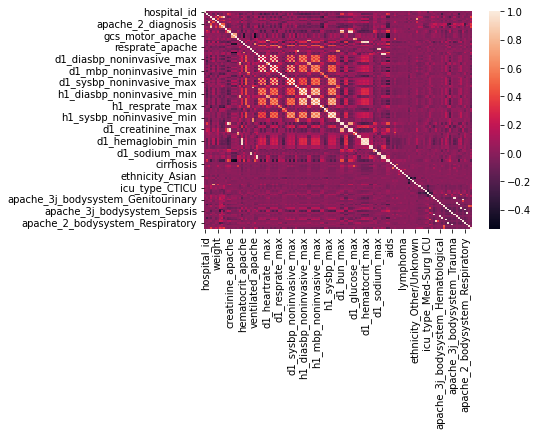

In [58]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [59]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [60]:
upper

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,NaN,-0.023046,0.014703,0.049647,0.033495,-0.000866,0.027434,0.005550,0.017585,0.047964,0.000385,-0.008449,0.013198,-0.026168,-0.013921,-0.009046,-0.007863,-0.001770,-0.000898,0.016270,-0.012759,-0.054585,0.003439,-0.059842,0.034473,0.019394,0.012832,-0.015559,0.012855,-0.015755,0.019620,-0.014032,0.005818,-0.030437,0.006060,-0.030315,0.014507,-0.083630,0.025829,-0.033792,-0.009972,-0.029607,-0.009554,-0.029469,0.034897,-0.080696,0.019332,-0.025912,0.019883,-0.022735,0.004763,-0.022250,0.011027,-0.032056,0.009597,-0.030069,-0.018210,-0.079155,0.034078,-0.026530,0.001634,-0.038579,-0.001074,-0.038528,-0.045206,-0.068144,-0.008044,-0.009023,-0.039987,-0.046007,0.015116,0.013134,-0.003566,0.003138,-0.032027,-0.030671,0.013144,0.007160,0.007119,-0.002012,-0.015735,-0.014463,0.021034,-0.011867,0.023314,-0.002739,0.023601,0.018441,-0.011255,0.001336,-0.003196,0.007668,0.004331,0.002292,-0.008219,-0.009682,0.002801,-0.007692,-0.019434,0.048282,-0.070106,-0.008408,-0.006511,0.010381,0.096917,0.019547,0.063454,0.054071,-0.151043,0.066156,0.055449,-0.022047,-0.006083,-0.002519,-0.007910,-0.012637,-0.019986,-0.018626,-0.022033,-0.011496,0.017696,-0.022047,-0.007910,-0.012637,-0.018626,-0.006110,-0.022033,0.017696,-0.004668,0.020737
age,NaN,NaN,-0.102192,0.054517,-0.123064,0.090182,-0.148448,-0.035333,-0.088868,0.045835,-0.019419,0.341147,0.206540,0.042142,0.035899,-0.021180,0.045058,-0.161223,-0.121132,-0.008750,-0.076555,0.031430,0.042749,-0.113531,0.006724,-0.011917,-0.073898,-0.251466,-0.073416,-0.251180,-0.154576,-0.151041,-0.014250,-0.17

In [ ]:
#high_cor_threshold=0.9

In [63]:
high_cor_features=[col for col in upper.columns if any(upper[col]>=0.9)]

In [64]:
high_cor_features

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [65]:
len(high_cor_features)

32

In [66]:
X1=X.drop(high_cor_features,axis=1)

In [67]:
X1.shape

(27795, 98)

In [68]:
X.shape

(27795, 130)

In [69]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [70]:
scale=MinMaxScaler()

X_final=scale.fit_transform(X1)

In [71]:
X_final=pd.DataFrame(X_final,columns=X1.columns)

In [72]:
X_final.head()

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_calcium_max,d1_calcium_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,apache_4a_hospital_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.574257,0.712329,0.148859,0.0,0.738140,0.011390,0.239484,0.057971,0.190949,0.0,0.219512,0.203125,0.666667,1.0,0.75,0.230481,0.594595,0.318182,0.0,0.00000,0.571429,0.414634,0.947368,0.0,0.293987,0.184874,0.311688,0.512605,0.503497,0.233871,0.266667,0.256410,0.250,1.000000,0.74,0.288732,0.268908,1.000000,0.898494,0.292453,0.450549,0.618644,0.666667,0.318966,0.500000,0.326531,0.152542,1.000000,0.74,0.378378,0.439716,1.000000,0.718750,0.500000,0.395833,0.176580,0.298039,0.250000,0.25000,0.201923,0.369176,0.285714,0.294118,0.371429,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.391089,0.835616,0.237400,0.0,0.390478,0.017132,0.214383,0.033816,0.048571,0.0,0.040650,0.023897,0.000000,0.4,0.00,0.189387,0.608108,0.588068,0.0,0.03750,0.517857,0.682927,0.394737,1.0,0.262806,0.411765,0.233766,0.504202,0.503497,0.483871,0.177778,0.230769,0.300,1.000000,0.70,0.485915,0.218487,0.250000,0.543224,0.226415,0.285714,0.576271,0.592593,0.310345,0.235849,0.428571,0.237288,0.944444,0.70,0.135135,0.127660,0.475410,0.531250,0.521739,0.520833,0.133829,0.372549,0.535714,0.59375,0.432692,0.949821,0.333333,0.411765,0.628571,0.742424,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.400990,0.698630,0.240043,0.0,0.912828,0.003346,0.416554,0.966184,0.143807,0.0,0.073171,0.037684,1.000000,1.0,1.00,0.209041,0.560811,0.795455,0.0,0.56250,0.553571,0.487805,0.592105,0.0,0.222717,0.453782,0.623377,0.462185,0.580420,0.540323,0.644444,0.230769,0.250,0.965517,0.91,0.584507,0.554622,0.354167,0.796989,0.490566,0.736264,0.313559,0.435185,0.534483,0.745283,0.040816,0.101695,0.966667,0.97,0.459459,0.638298,0.540984,0.593750,0.565217,0.687500,0.154275,0.360784,0.535714,0.62500,0.846154,0.236559,0.261905,0.382353,0.400000,0.530303,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.574257,0.410959,0.207679,0.0,0.520637,0.003336,0.230665,0.033816,0.048571,0.0,0.089431,0.064338,0.000000,0.6,0.00,0.185814,0.567568,0.795455,1.0,0.45625,0.535714,0.365854,0.565789,1.0,0.195991,0.361345,0.623377,0.336134,0.447552,0.427419,0.600000,0.102564,0.225,1.000000,0

In [73]:
X_final.corrwith(Y)

hospital_id                                 -0.018689
age                                         -0.009518
bmi                                          0.006779
elective_surgery                            -0.011217
height                                      -0.011496
pre_icu_los_days                            -0.001166
weight                                       0.001936
apache_2_diagnosis                           0.000222
apache_3j_diagnosis                         -0.011126
arf_apache                                  -0.004057
bun_apache                                  -0.007310
creatinine_apache                           -0.011885
gcs_eyes_apache                             -0.009086
gcs_motor_apache                            -0.007279
gcs_verbal_apache                           -0.012828
glucose_apache                              -0.010924
heart_rate_apache                           -0.004311
hematocrit_apache                           -0.000382
intubated_apache            

In [ ]:
# Model Building process

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y,test_size=0.2,stratify=Y,random_state=100)

In [76]:
#import algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC


In [77]:
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()

# Modeling

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict

In [79]:
from sklearn.model_selection import cross_validate

In [80]:
for model in[rf,bg,dt,svc]:
    print("======="*5)
    print("Performance of",model)
    print("======="*5)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=50)
    scoring=["roc_auc","f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,X_final,Y,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)
    
    # print of metrics
    print("ROC AUC",roc_auc_test_cv) 
    print("F1 MACRO",f1_test_cv) 
    print("PRECISION MACRO",precisio_test_cv) 
    print("RECALL MACRO",Recall_test_cv) 
    

Performance of RandomForestClassifier()
ROC AUC 0.8748
F1 MACRO 0.658
PRECISION MACRO 0.8316
RECALL MACRO 0.6138
Performance of BaggingClassifier()
ROC AUC 0.8219
F1 MACRO 0.658
PRECISION MACRO 0.7687
RECALL MACRO 0.6198
Performance of DecisionTreeClassifier()
ROC AUC 0.6441
F1 MACRO 0.6389
PRECISION MACRO 0.6343
RECALL MACRO 0.6441
Performance of SVC()
ROC AUC 0.8242
F1 MACRO 0.6154
PRECISION MACRO 0.8429
RECALL MACRO 0.5808


In [81]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in[rf,bg,dt,svc]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS) 
    #print("PRECISION MACRO",precisio_test_cv) 
    #print("RECALL MACRO",Recall_test_cv) 

Performance of RandomForestClassifier()
confusion matrix 
 [[4995   57]
 [ 380  127]]
Accuracy 
 0.9213887389818313
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.69      0.25      0.37       507

    accuracy                           0.92      5559
   macro avg       0.81      0.62      0.66      5559
weighted avg       0.91      0.92      0.90      5559

ROC_AUC 
 0.6196052181572006
MACRO Precision_recall_F1 
 (0.8097598584428716, 0.6196052181572006, 0.6628363939383131, None)
Performance of BaggingClassifier()
confusion matrix 
 [[4953   99]
 [ 368  139]]
Accuracy 
 0.9159920849073574
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5052
           1       0.58      0.27      0.37       507

    accuracy                           0.92      5559
   macro avg       0.76      0.63      0.66      5559
we

In [ ]:
# balancing the data

In [83]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids

In [84]:
smote = SMOTE()
adasyn=ADASYN()
over=RandomOverSampler()
border=BorderlineSMOTE()
under=RandomUnderSampler()

In [85]:
for model in[rf,bg,dt,svc]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    for balancer in[smote,border,under]:
        X_train_1,Y_train_1=balancer.fit_resample(X_train,Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        print("ROC_AUC \n",ROC) 
        print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS) 
    #print("PRECISION MACRO",precisio_test_cv) 
    #print("RECALL MACRO",Recall_test_cv) 

Performance of RandomForestClassifier()
confusion matrix 
 [[4774  278]
 [ 266  241]]
Accuracy 
 0.9021406727828746
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      5052
           1       0.46      0.48      0.47       507

    accuracy                           0.90      5559
   macro avg       0.71      0.71      0.71      5559
weighted avg       0.90      0.90      0.90      5559

ROC_AUC 
 0.710158727927776
MACRO Precision_recall_F1 
 (0.7057883750802826, 0.7101587279277759, 0.7079407463035975, None)
confusion matrix 
 [[4765  287]
 [ 284  223]]
Accuracy 
 0.8972836841158481
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5052
           1       0.44      0.44      0.44       507

    accuracy                           0.90      5559
   macro avg       0.69      0.69      0.69      5559
weighted avg       0.90      0.90     

In [ ]:
# please import gradient boost, ada boost,xg boost,catboost,naive bayes and try here

In [ ]:
There are 2 columns - apache_3j_bodysystem and apache_2_bodysystem which belong 
to this category. Both of them provide the admission diagnosis group for 
APACHE II and III, respectively.

APACHE or Acute Physiology and Chronic Health Evaluation is another ICU scoring 
system which provides information about the severity of disease and risk of 
deaths in the first 24 hours of patient's admission to an ICU. 
The range lies between 0 and 71 (integers), higher the number, 
greater the risk of death.

Since both columns are effectively APACHE columns, it can be expected that 
both of them have high correlation. The same is seen as per this report:

"Results: Both systems showed a significant association between higher scores 
and higher mortality. The APACHE II system under-predicted the actual hospital 
mortality rate. The APACHE III systems had a higher discriminative power 
(area 0.7462) than the APACHE II systems (area 0.6856; p < 0.05)."

This shows that APACHE III is a better score than APACHE II. Thus, whenever 
required, we will prefer APACHE III over APACHE II. This will also help in 
reducing multi-correlation between columns.